In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import quad_vec
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

# Assignment

## Question

A charge density is given by

$$\rho(r, \theta, z) = \rho_0 R^2 \delta(r-R)\delta(z)\sin(\theta) $$

where $(r, \theta, z)$ are cylindrical coordinates. This charge density should be interpretted as a ring of charge where the top portion is positively charged and the bottom portion is negatively charged. Plot the x and y components of the electric field as a function of $x$ in the range $(-R/2, R/2)$ at $y=R/2$ and $z=0$. 

* Put each plot on a seperate canvas.
* *Hint: This question is very closely linked to the tutorial problems.*

## Answer

We have (where $\mathscr{r} = \vec{r} - \vec{r}'$)

\begin{align*}
4 \pi \epsilon_0 \vec{E} &= \iiint \frac{\rho(\vec{r}')}{|\mathscr{r}|^{3}}\vec{\mathscr{r}} d\tau \\
&= \iiint \frac{\rho_0 R^2 \sin(\theta')\delta(r'-R) \delta(z')}{((x-r'\cos\theta')^2+(y-r'\sin\theta')^2+(z-z')^2)^{3/2}} \begin{pmatrix}
           x-r'\cos(\theta') \\
           y-r'\sin\theta' \\
           z-z'
         \end{pmatrix}r'dr'd\theta'dz'\\
&= \int_{0}^{2 \pi} \frac{\rho_0 R^2 \sin(\theta')}{((x-R\cos\theta')^2+(y-R\sin\theta')^2+z^2)^{3/2}}\begin{pmatrix}
           x-R\cos(\theta') \\
           y-R\sin\theta' \\
           z
         \end{pmatrix} R d\theta'       
\end{align*}

You are asked to consider both the x-component and the y-components of the electric field at $y=R/2$, $z=0$ and $x: -R/2 \to R/2$. For now we will just do the x-component. Note that we have unknown variables ($\rho_0$ and $R$) so we're going to have to plot something different then just $E_x$ itself (see tutorial question 3)

$$4 \pi \epsilon_0 E_x  = \int_{0}^{2 \pi} \frac{\rho_0 R^2 \sin(\theta')(xR-R^2\cos\theta')}{((x-R\cos\theta')^2+(y-R\sin\theta')^2+z^2)^{3/2}} d\theta'$$

We want to obtain things like $x/R$ and $y/R$ in the integral so we can perform a numerical integration when $y/R=1/2$ and $x/R: -1/2 \to 1/2$. The problem is we need to multiply the numerator of the integrand by $1/R^4$ and the denominator by $1/R^3$ to get our integral in this form. We can do this as long as we also divide the left hand side of the expression by $R$. We also divide by $\rho_0$ to remove it from the integral. In this case we get

$$\left(\frac{4 \pi \epsilon_0}{\rho_0 R}\right) E_x  = \int_{0}^{2 \pi} \frac{\sin(\theta')((x/R)-\cos\theta')}{((x/R-\cos\theta')^2+(y/R-\sin\theta')^2+(z/R)^2)^{3/2}} d\theta'$$

Now we can numerically integrate the right hand side since we have numerical values for $x/R$, $y/R$ and $z/R$. 

In [2]:
def integrand(theta, x, y, z):
    return (np.sin(theta)*(x-np.cos(theta)))/((x-np.cos(theta))**2+(y-np.sin(theta))**2+z**2)**(3/2)
def integral(x,y,z):
    return quad(integrand, 0, 2*np.pi, args=(x,y,z))[0]

Get numerical arrays to plot.

In [3]:
x = np.linspace(-1/2, 1/2, 1000)
E_x = [integral(x_i, 1/2, 0) for x_i in x]

Do plotting.

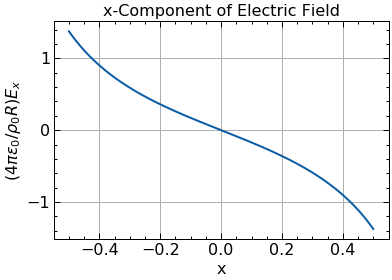

In [4]:
plt.plot(x,E_x)
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$(4 \pi \epsilon_0/\rho_0 R)E_x$', fontsize=16)
plt.title('x-Component of Electric Field', fontsize=16)
plt.grid()

## Aside

Note the following difference:

* Tutorial problem 3: Plot $\left(\frac{4 \pi \epsilon_0 R^2}{q}\right) \cdot \text{Electric Field}$
* Assignment: Plot $\left(\frac{4 \pi \epsilon_0}{\rho_0 R}\right) \cdot \text{Electric Field}$

Note that both are dimensionless quantities.